### Supervised Learning: Linear Regression - Feature and Model Selection

Jay Urbain, PhD

We will be working with the`Bike Sharing Demand` dataset from a prior Kaggle competition:  
https://www.kaggle.com/c/bike-sharing-demand 

**Assignment objective:** perform: 
- data analysis and visualization      
- preprocessing and feature engineering 
- fit a uni-variate linear regression model   
- fit a mutli-variate linear regression model   
- evauate the importances of each feature  
- identify a subset of features to maximize model performance .  

**Dataset Description:**
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

**Kaggle Objective:** 
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

**Data Fields:**  
**datetime** - hourly date + timestamp    
**season** - 1: spring, 2: summer, 3: fall, 4: winter    
**holiday** - whether the day is (1) or is not (0) considered a holiday   
**workingday** - whether the day is neither a weekend nor holiday   
**weather** -    
&nbsp;&nbsp;1: Clear, Few clouds, Partly cloudy, Partly cloudy    
&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      
&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
**temp** - temperature in Celsius   
**atemp** - "feels like" temperature in Celsius   
**humidity** - relative humidity   
**windspeed** - wind speed   
**casual** - number of non-registered user rentals initiated   
**registered** - number of registered user rentals initiated   
**count** - number of total rentals  (casual + registered) .  

**References**:   
- Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.
- https://www.kaggle.com/c/bike-sharing-demand (Kaggle site) 
- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning, with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4
- [scikit-learn](http://scikit-learn.org/stable/)  
- https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-1-c816ea9c51e1  

Carefully execute each cell in the notebook. Perform tasks or answer questions in the cell(s) below each bolded **TODO** in the in the notebook. Its important to carefully read each cell before proceeding.


#### Import libraries

*Note: If you haven't done so, make sure you create a conda environment (see week 1 notebook) and install your libraries after selecting that environment.*   

For this assignment you will need the following python libraries:  
- numpy  
- matplotlib   
- pandas   
- seaborn  
- sklearn   

It is customary to import your libraries towards the top of your notebook. If you are missing any of the libraries you can install them using:  
> conda install `library_name`  
or install from a specific collection:  
conda install -c anaconda `library_name`  
or using pip:  
pip install `library_name` 

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt # plotting package
import seaborn as sns           # more specialized plotting package built on matplotlib
from matplotlib import style
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# generate plots within notebook rather than external window
%matplotlib inline

import numpy as np  # linear algebra
import pandas as pd # data frame, dataprocessing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV # regression models

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#### Import the data

In [2]:
import os
print(os.listdir("data/bike-sharing-dataset"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [3]:
# for mac or linux
!ls data/bike-sharing-dataset


sampleSubmission.csv test.csv             train.csv


We are interested in the train.csv and test.csv files generated for the Kaggle competition.

Create Pandas dataframes for the train and test data.

In [4]:
train=pd.read_csv(r'data/bike-sharing-dataset/train.csv')
test=pd.read_csv(r'data/bike-sharing-dataset/test.csv')
df_train=train.copy()
df_test=test.copy()

#### Analyze the data

The shape attribute of the data provides a tuple of the dataframes dimensions. 

In [5]:
df_train.shape

(10886, 12)

In [6]:
df_test.shape

(6493, 9)

Why does the test set have 3 fewer columns?

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Answer: Since this is a Kaggle competition, the test set provided does not include target variables for prediction. Note how `casual` + `registered` = `count`. We will need to take care and not include them as a feature in our model.

For this exercise, we will need to construct our own test data from the training data supplied. If you would like to sumbit your results to Kaggle, you would use the supplied test data and evaluate your model on *root mean squared log error.*

The info() method provides counts and data types for each field.

In [9]:
df = df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


We can also get to the type information using the 'dtypes' field which accesses the underlying numpy type for each column (Pandas Series) in the dataframe.

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

An important preprocessing step is to determine if we have any missing or null values. If we do, we need to either remove them or impute some missing value.

https://scikit-learn.org/stable/modules/impute.html  

If the sum is zero, we have not problem.


In [11]:
df.isnull().sum()  

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Exploratory feature analysis

We should evaluate each predictor (feature) indvidually and with respect to the target variable `count`. We are interested in the distribution of the data and whether there is any correlation between features and the target variable.

For categorical data we can use value counts per category for a quantitative estimate. And either a barplot with value counts or a factorplot which counts values automatically to gain a better understanding of the distribution of each category.


**Distribution of categorical variables**

Lets start with `season`

season - 1: spring, 2: summer, 3: fall, 4: winter

In [12]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

We can use the Seaborn categorical plot (formerly called a factor plot) to show this distribution graphically.

https://seaborn.pydata.org/tutorial.html


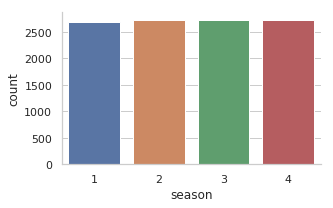

In [13]:
x = sns.catplot(x='season', data=df, kind='count', height=3, aspect=1.5)

*Observations:* The samples are evenly distributed across seasons. This is good. We will not have to take special steps to deal with an unbalanced dataset.

`Holiday`

0    10575
1      311
Name: holiday, dtype: int64


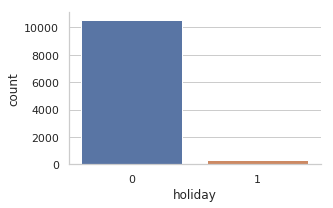

In [14]:
#holiday
print( df_train.holiday.value_counts() )
sns.catplot(x='holiday',data=df,kind='count',height=3,aspect=1.5) # majority of data is for non holiday days.

*Observations:* The vast majority of samples are non-holiday work days.

`Weather`

**weather** -    
&nbsp;&nbsp;1: Clear, Few clouds, Partly cloudy, Partly cloudy    
&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      
&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**TODO** Generate counts, a plot, and record your observations for weather.

In [15]:
# weather counts
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

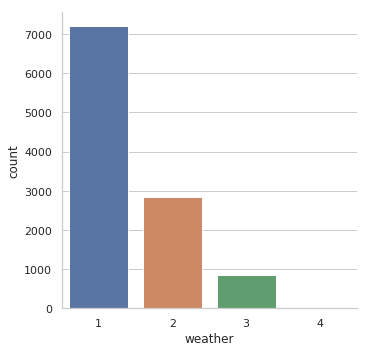

In [16]:
# categorical weather plot
sns.catplot(x='weather', data=df, kind='count')

*Observations:* Looks very heavy. Nice weather outside == we are going outside!   

Highest demand in nice weather. This feature (weather) is likely to be predictive of the target variable `count`.

`temp` - temperature in Celsius   

**TODO** Generate counts, a plot, and record your observations for temp.


In [17]:
# Temp counts    
df.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

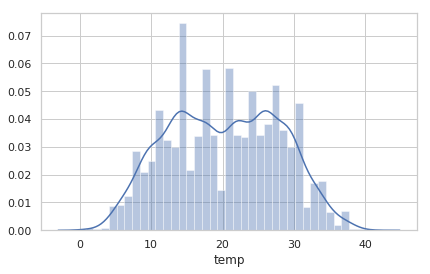

In [18]:
sns.distplot(df.temp)

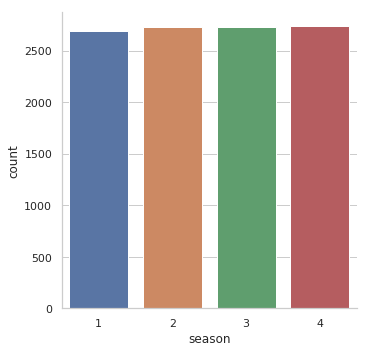

In [19]:
# Categorical plot 
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter
sns.catplot(x='season', data=df, kind='count')

We can observe the relationship of categorical attributes with resect to numeric (continuous) variables such as our target `count` with a categorical box plot.

https://seaborn.pydata.org/tutorial/categorical.html

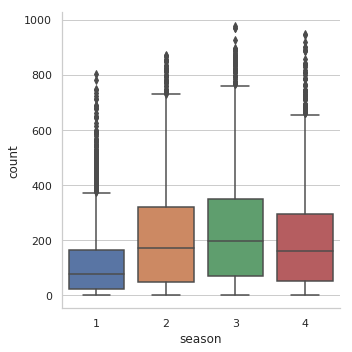

In [20]:
sns.catplot(x="season", y="count", kind="box", data=df);

**TODO**: What can you observe about the distribution of `count` (number of riders) for each season? Can you come up with a hypothesis to explain the outliers?

*Observations:*


It looks like there is a large amount of outliers pressent in the dataset. Factoring in the linear regression analysis I performed easlier, I predict that there are significant predictors that do not correlate with season that effect count value.

**Distribution of continuous variables.**

We can use the dataframe to `describe()` method to quantify the distribution of continuous variables. *Note: these measures do not make a lot of sense for categorical variables.*


In [21]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


We can show the continuous variable distributions with a single box plot.

The box plot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Lets generate a boxplot for our target variable `count`

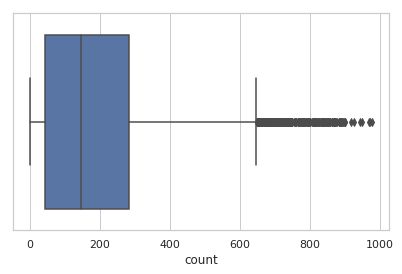

In [22]:
sns.boxplot(x="count", data=df);

**TODO:** From the boxplot for `count` above, identify the approximate median value.
Also identify if the data is normally distributed and if there are any significant outliers.

*Observations:*

It looks like the median value is around 160. The data does not appear to be normally distributed as there are a large number of outliers.

Generate boxplots for each of the following numerical attributes. 

`temp` - temperature in Celsius   
`atemp` - "feels like" temperature in Celsius   
`humidity` - relative humidity   
`windspeed` - wind speed 

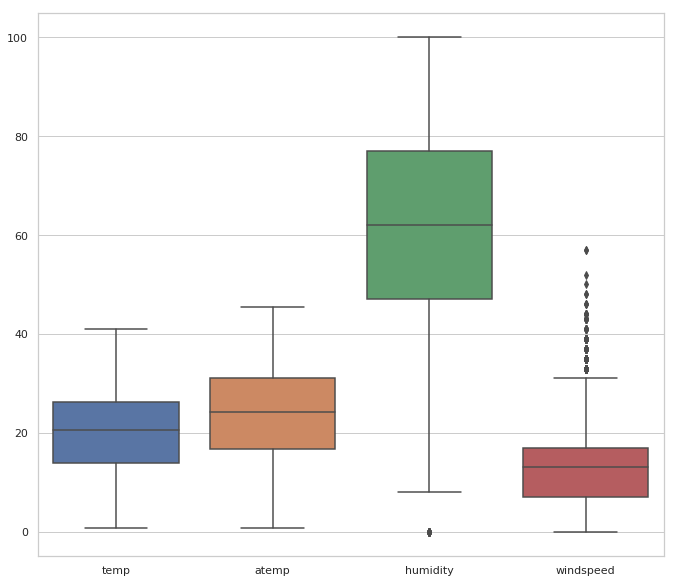

In [23]:
# just to visualize.
sns.boxplot(data=df[['temp', 'atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

**TODO:**

Record your observations for each continuous variable.



*Observations:*

temp and atemp have tight ranges with minimal outliers and a normal distribution. Windspeed has a left leaning distribution with many extreme value outliers. Humidity has a long, normal spread accross 10 thru 100, with some minior low value outliers.

We can also view distributions of continuous variables with histograms.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


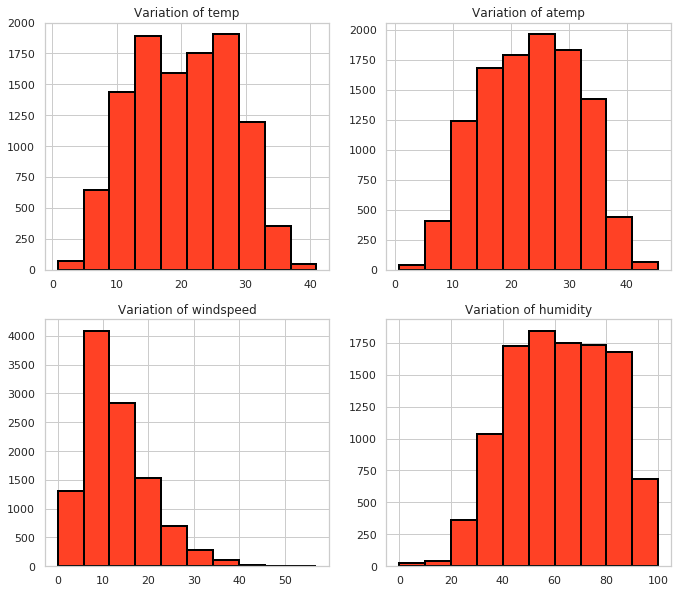

In [24]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

**Visualizing statistical relations**

After reviewing the distributions for categorical and continuous variables. We would like to visualize relations between variables. Especially between each predictor and the target.

https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [25]:
# Drop casual and registred since count + registred = count
df.drop(['casual','registered'],axis=1,inplace=True)

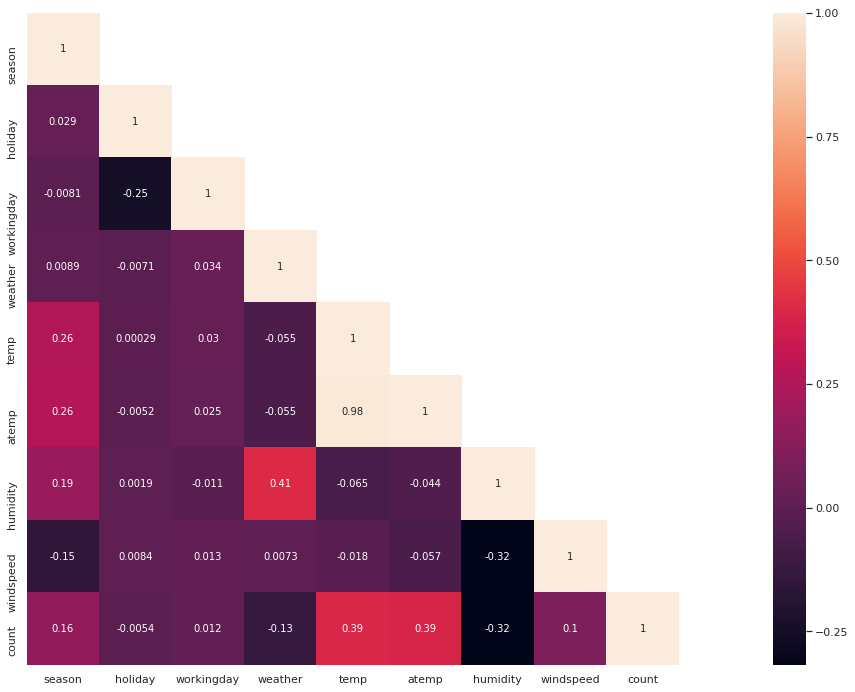

In [26]:
#correlation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
x = sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**TODO:**  
1) Identify ~3 pairs of variables with the highest correlation.    
2) Identify `3 predictor variables that have the highest correlation with the target variable `count`.  



Answer here:

1. (temp and count), (atempt and count), (humidity and weather)
2. temperature, feels like temperature, and humidity


#### Feature Engineering

First, we have to replace categorical values with either the category type or one-hot (dummie encoding).

We can use the Pandas `get_dummies()` method:   
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Alternatively, there is the scikit-learn `OneHotEncoder`.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 

In [27]:
# one-hot encoding for season

season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(df_test['season'],prefix='season')
df_test=pd.concat([df_test,season],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


**TODO:** Perform one-hot encoding for weather on df and df_test datasets

In [28]:
# one-hot encode weather
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(df_test['weather'],prefix='weather')
df_test=pd.concat([df_test,weather],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [29]:
# we can now can drop weather and season.
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
df_test.drop(['season','weather'],inplace=True,axis=1)
df_test.head()


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


Split the date and time, as the time of day is expected to effect the number of bikes. For example, rush hour.

In [30]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [31]:
df_test["hour"] = [t.hour for t in pd.DatetimeIndex(df_test.datetime)]
df_test["day"] = [t.dayofweek for t in pd.DatetimeIndex(df_test.datetime)]
df_test["month"] = [t.month for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = [t.year for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = df_test['year'].map({2011:0, 2012:1})
df_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [32]:
# drop datetime column.
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


#### Review our features

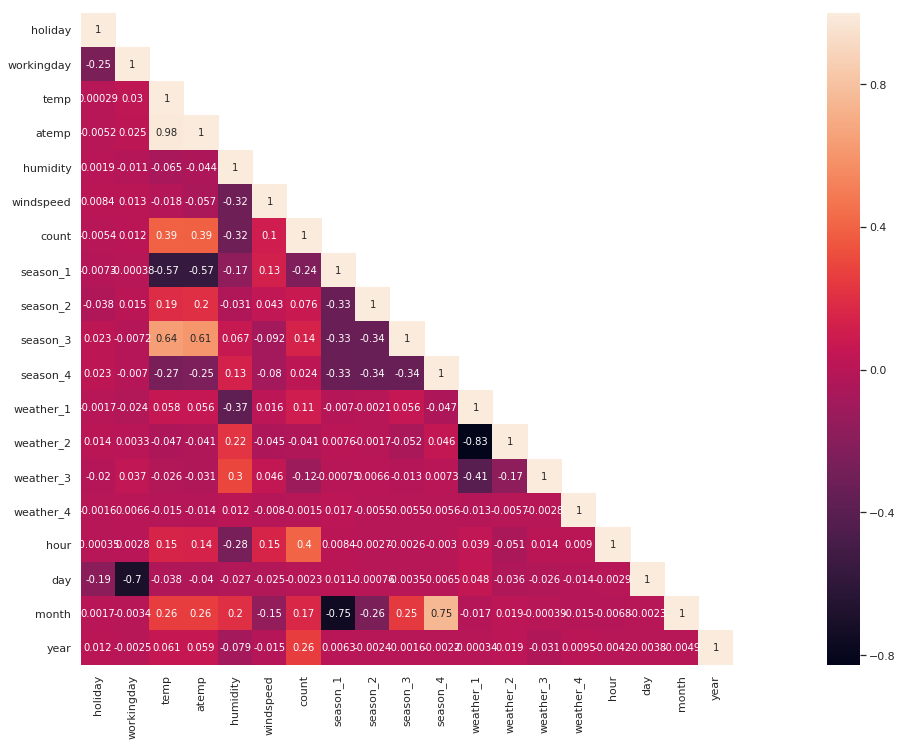

In [33]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [34]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [35]:
# verify we haven't inadvertantly added any null values
df.isna().sum()

holiday       0
workingday    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
season_1      0
season_2      0
season_3      0
season_4      0
weather_1     0
weather_2     0
weather_3     0
weather_4     0
hour          0
day           0
month         0
year          0
dtype: int64

#### Scikit-learn for multivariate regression

*Scikit-learn* can be used for univariate or multivariate regression.

The [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class is called an estimator. 

Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the *fit()* and *predict()* methods. The *fit()* method is used to learn the parameters of a model, and the *predict()* method is used to predict the value of a response variable for a given predictor variable using the learned coefficients. 

In [36]:
# Import Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

[Scikit-learn Linear Model Documentation](http://scikit-learn.org/stable/modules/linear_model.html).

$ y(\beta,x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $

Where $\beta = (\beta_1, ...\beta_p)$ are the coefficients and $ \beta_0 $ as the intercept.

**TODO:** .  
Create a LinearRegression object.

*Reminder: After typing in an object, you can press tab to see a list of methods*.

In [37]:
# Create a LinearRegression Object
lreg = LinearRegression()

LinearRegression functions:

- lreg.fit(): fits a linear model

- lreg.predict(): predict Y from X using the linear regression model coefficients

- lreg.score(): returns $R^2$, the [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination)

Separate the bike sharing dataframe into feature (predictor) columns and the target column:

In [38]:
# Data Columns
X_multi = df.drop('count',1)

# Targets
Y_target = df['count']

**TODO:** Fit the multi-variate linear regression model.

In [39]:
# Implement Linear Regression
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Check the intercept and the number of coefficients.

In [40]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -50.91 


In [41]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 18 


Create a DataFrame to examine the model and the estimated coefficients.

In [42]:
# Create a DataFrame from the Features
coeff_df = pd.DataFrame(df.columns)
coeff_df.columns = ['Features']

# Add a new column with the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
print ('Table 1. Multivariate coefficients')
coeff_df

Table 1. Multivariate coefficients


,Features,Coefficient Estimate
0,holiday,0.389340
1,workingday,4.276178
2,temp,5.238130
3,atemp,2.717360
4,humidity,-1.925788
5,windspeed,0.532523
6,count,16.142057
7,season_1,13.971614
8,season_2,-34.236902
9,season_3,4.123230


In [43]:
coeff_df['absolutes'] = coeff_df['Coefficient Estimate'].apply(lambda x : abs(x))

In [44]:
coeff_df.sort_values(by='absolutes').tail(10)


,Features,Coefficient Estimate,absolutes
14,weather_4,7.667492,7.667492
16,day,9.144934,9.144934
10,season_4,-10.681799,10.681799
7,season_1,13.971614,13.971614
6,count,16.142057,16.142057
8,season_2,-34.236902,34.236902
12,weather_2,-40.227998,40.227998
13,weather_3,54.894927,54.894927
17,month,81.027192,81.027192
18,year,NaN,NaN


**TODO**: Which coefficients, have the strongest correlation with respect to the target variable. Use the cell below. *Note: consider one-hot encoded values as one variable, i.e., season and weather*

Observations:

month, weather, and season are high correlating values. 

#### Training and Validation Sets


Separate training and test sets should be used to train and validate the performance of the model.

Samples for each set should be randomly selected.

Fortunately, scikit-learn has a built in function specifically for this called `train_test_split()`.

Below, we are creating separate training and tests sets, holding out 20% of the data for testing. 

In [45]:
# from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, test_size=0.2, random_state=0)


In [46]:
X_train.shape

(8708, 18)

Display the results of the data split.

In [47]:
# Print shapes of the training and testing data sets
# print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# #numpy expects matrix with dimension column
# X_train = X_train.values.reshape(X_train.shape[0],1)
# Y_train = Y_train.values.reshape(Y_train.shape[0],1)
# X_test = X_test.values.reshape(X_test.shape[0],1)
# Y_test = Y_test.values.reshape(Y_test.shape[0],1)

print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8708, 18) (2178, 18) (8708,) (2178,)


#### Predicting Demand

We can use our training set to build the model, and the test set to evaluate the performance of our model.

In [48]:
# Regression object
lreg = LinearRegression(normalize=True)

# Build a linear regression model on the training data only
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Perform prediction on both the training set and the test set.

In [49]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

**TODO:** 

Calculate the root mean square error on your training set Y_train and your test set Y_test.

In [50]:
# calculate RMSE 

print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train - pred_train) ** 2)) )
    
print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test - pred_test) ** 2)) )



Fit a model X_train, and calculate RMSE with Y_train: 140.50
Fit a model X_train, and calculate RMSE with X_test and Y_test: 141.29


**TODO:** Build a univariate model with a feature that you believe is highly correlated with `count'.

In [51]:
# Univariate model in the cells below

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(df[['weather_1','weather_2','weather_3','weather_4']], Y_target, test_size=0.2, random_state=0)


In [52]:
lreg2 = LinearRegression()
lreg2.fit(X_train,Y_train)
pred_train = lreg2.predict(X_train)
pred_test = lreg2.predict(X_test)

**TODO:** 

Calculate the root mean square error on your training set Y_train and your test set Y_test for your univariate model.

In [53]:
# calculate RMSE 
print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train - pred_train) ** 2)) )
print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test - pred_test) ** 2)) )


Fit a model X_train, and calculate RMSE with Y_train: 179.18
Fit a model X_train, and calculate RMSE with X_test and Y_test: 180.90


**TODO** Does our multivariate linear regression model reduce the RMSE with respect to the univariate model?

*Observations:*
The multivariate model reduces the RMSE value by 39 points. 

**Question** Does our multivariate linear regression model explain more the variance?

*Observations:*
The multivariate model does capture more of the variance in the model.

#### Residual Plots

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable (x) on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. A good model fit will show data points randomly and evenly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some aspect of the data. There could be an interaction between predictor variables that we are not considering, or the data may be inherently non-linear.

[Residual plots](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

In [54]:
# from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, test_size=0.2, random_state=0)


In [55]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Text(0.5, 1.0, 'Residual Plots')

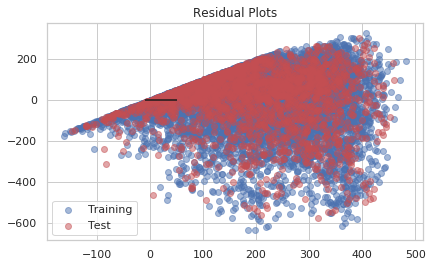

In [56]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Linear regression is a broad topic with many applications. More information can be found in the scikit-lear documentation:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model

**TODO** Review Table 1. Multivariate coefficients. Think about the meaning of a linear regression model, i.e., the 
coefficient reflects the change in the target variable for a one unit change in an input variable, with all other 
variables held constant. Identify a subset of features and build a model with these features. See if you can reduce 
RMSE and increase $R^2$.* 

Document your results in the cell below.

*Observations*:
    


In [57]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'hour', 'day', 'month', 'year'],
      dtype='object')

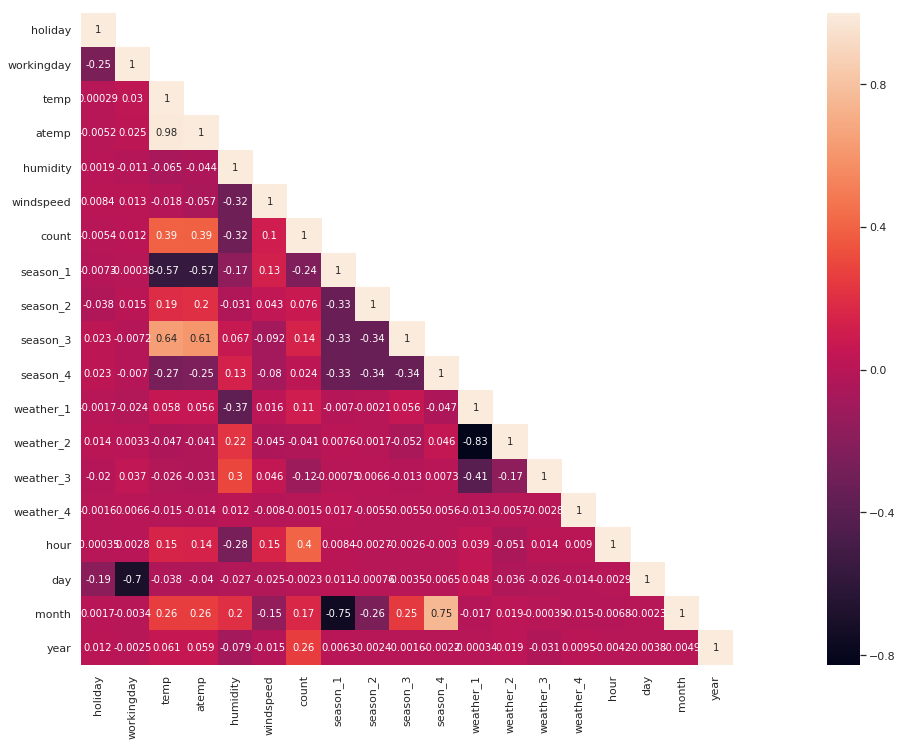

In [58]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [59]:
big_ticket_predictors = ['season_1', 'season_2', 'season_3', 'season_4', 'hour','month','year']

In [60]:
lin_reg3 = LinearRegression()
X_multi3 = df[big_ticket_predictors]
Y_target3 = df['count']
X_train3, X_test3, Y_train3, Y_test3 = sklearn.model_selection.train_test_split(X_multi3, Y_target3, test_size=0.2, random_state=0)
lin_reg3.fit(X_train3, Y_train3)
pred_train3 = lin_reg3.predict(X_train3)
pred_test3 = lin_reg3.predict(X_test3)
print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train3 - pred_train3) ** 2)) )
print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test3 - pred_test3) ** 2)) )
print("R2 squared on test set is %f" % r2_score(Y_test3, pred_test3))

Fit a model X_train, and calculate RMSE with Y_train: 152.26
Fit a model X_train, and calculate RMSE with X_test and Y_test: 152.07
R2 squared on test set is 0.303983


### Observation Result

it looks like my R2 value (unadjusted) went down as I reduced the number of input features. as expected.

#### Recursive Feature Elimination

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

Example: Perform RFE or RFECV using the linear regression model.

In [61]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV, RFE #NOTE!!!!!!!! THIS IMPORT~~ ALERT!!!
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
lr = LinearRegression()
selector = RFE(lr, n_features_to_select=5)
selector = selector.fit(X_train,Y_train)
print( selector.support_ )
print( selector.ranking_ )

[False False False False False False False False  True  True False False
  True  True False False False  True]
[ 5 12  3 11 10 14  7  8  1  1  4  2  1  1  6 13  9  1]


In [62]:
X_multi.columns[selector.support_]

Index(['season_3', 'season_4', 'weather_3', 'weather_4', 'year'], dtype='object')

In [63]:
X_multi[ X_multi.columns[selector.ranking_==1]][:5]


,season_3,season_4,weather_3,weather_4,year
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [64]:
X_multi_imp = X_multi[ X_multi.columns[selector.ranking_==1]]
X_multi_imp[:5]

,season_3,season_4,weather_3,weather_4,year
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [65]:
X_train_imp, X_test_imp, Y_train_imp, Y_test_imp = sklearn.model_selection.train_test_split(X_multi_imp, Y_target, test_size=0.2, random_state=0)


In [66]:
# Regression object
lreg = LinearRegression()

# Build a linear regression model on the training data only
lreg.fit(X_train_imp,Y_train_imp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train_imp)
pred_test = lreg.predict(X_test_imp)

In [68]:
print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train_imp - pred_train) ** 2)) )
    
print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test_imp - pred_test) ** 2)) )

Fit a model X_train, and calculate RMSE with Y_train: 171.68
Fit a model X_train, and calculate RMSE with X_test and Y_test: 170.68


In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_imp, pred_test) 
r2

0.12327088109030115

$R^2 = 1 - \frac{RSS}{TSS}$ 

$Adjusted R^2 = 1 - \frac{RSS/(n-d-1)}{TSS/(n-d)}$ 

Scikit-learn provides an $R^2$ measurement, but not Adjusted $R^2$. You can calculate  Adjusted $R^2$ from $R^2@ as follows:

$Adjusted R^2 = 1 - (1-R^2)*\frac{(n-1)}{(n-d-1)}$

In [70]:
n = X_train_imp.shape[0]
p = X_train_imp.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.1227671295855266

**TODO:** Using RFE, identify the optimal number of features using `LinearRegression()` based on Adjusted $R^2$.

In [71]:
def rfe_automagically(model, num_feat):
#     print('using model %s' % model)
#     print('using %d features' % num_feat)
    selector = RFE(lr, n_features_to_select=num_feat)
    selector = selector.fit(X_train,Y_train)
#     print( selector.support_ )
#     print( selector.ranking_ )
    # X_multi.columns[selector.support_]
    # X_multi[ X_multi.columns[selector.ranking_==1]][:5]
    X_multi_imp = X_multi[ X_multi.columns[selector.ranking_==1]]
    # X_multi_imp[:5]
    X_train_imp, X_test_imp, Y_train_imp, Y_test_imp = sklearn.model_selection.train_test_split(X_multi_imp, Y_target, test_size=0.2, random_state=0)

    model.fit(X_train_imp,Y_train_imp)
    # Predictions on training and testing sets
    pred_train = model.predict(X_train_imp)
    pred_test = model.predict(X_test_imp)
#     print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train_imp - pred_train) ** 2)) )
#     print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test_imp - pred_test) ** 2)) )

    r2 = r2_score(Y_test_imp, pred_test) 
#     print('R squared value: %f' % r2)
    n = X_train_imp.shape[0]
    p = X_train_imp.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#     print('Adjusted R squared value: %f' % adj_r2)
    return (adj_r2, num_feat)


In [72]:
# your work in the cell(s) below
print(rfe_automagically(LinearRegression(), 100))

(0.39831378210887425, 100)


In [73]:
vals = []
for n in range (1, len(df.columns)):
    vals.append(rfe_automagically(LinearRegression(), n))

In [74]:
res = pd.DataFrame(vals)

In [75]:
res.columns = ['adj_r2','num_feat']

In [76]:
res.head()

,adj_r2,num_feat
0,0.087802,1
1,0.087704,2
2,0.099507,3
3,0.121142,4
4,0.122767,5


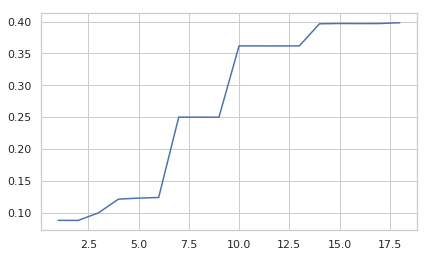

In [77]:
# plt.plot(res.adj_r2, res.num_feat)
plt.plot(res.num_feat, res.adj_r2)

In [78]:
def getDFofAdjR2ForModelUsingRFE(model):
    list_res_of_model = []
    for num_feat in range(1, len(df.columns)):
        list_res_of_model.append(rfe_automagically(model, num_feat))
    res_df = pd.DataFrame(list_res_of_model).copy()
    res_df.columns = ['adj_r2','num_feat']
    return res_df

In [79]:
def plotRes(res, title):
    plt.plot(res.num_feat, res.adj_r2)
    plt.title(title)
    plt.xlabel('Number of Features')
    plt.ylabel('Adj R2')
    plt.show()

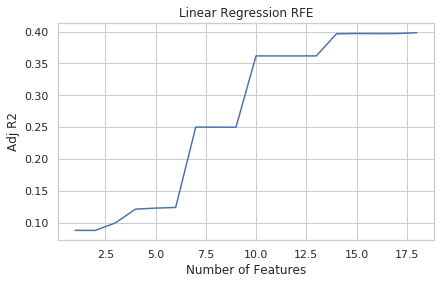

In [80]:
df_linear_reg = getDFofAdjR2ForModelUsingRFE(LinearRegression())
plotRes(df_linear_reg, 'Linear Regression RFE')

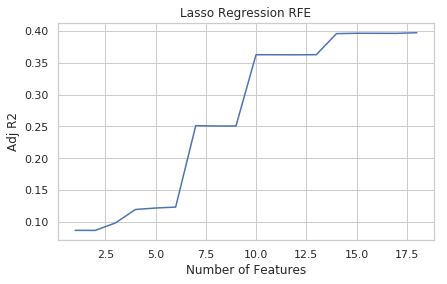

In [81]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(1.0))
plotRes(df_lasso, 'Lasso Regression RFE')

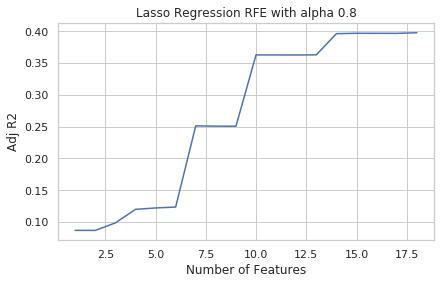

In [82]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(0.8))
plotRes(df_lasso, 'Lasso Regression RFE with alpha 0.8')

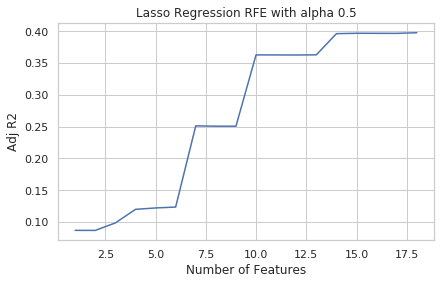

In [83]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(0.8))
plotRes(df_lasso, 'Lasso Regression RFE with alpha 0.5')

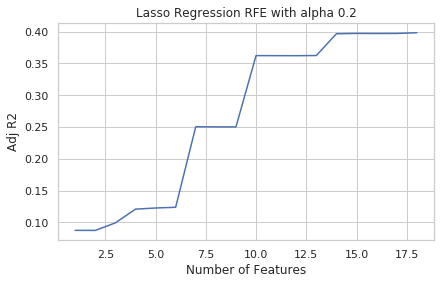

In [84]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(0.2))
plotRes(df_lasso, 'Lasso Regression RFE with alpha 0.2')

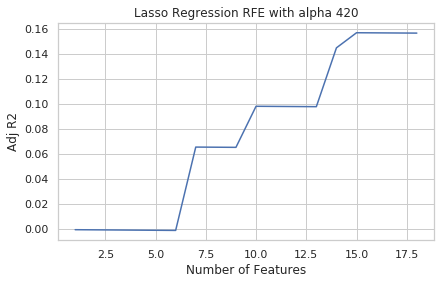

In [85]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(420))
plotRes(df_lasso, 'Lasso Regression RFE with alpha 420')

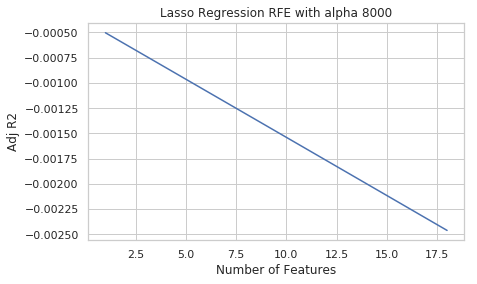

In [86]:
df_lasso = getDFofAdjR2ForModelUsingRFE(Lasso(8000))
plotRes(df_lasso, 'Lasso Regression RFE with alpha 8000')

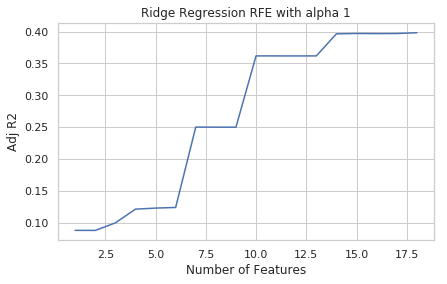

In [87]:
df_ridge = getDFofAdjR2ForModelUsingRFE(Ridge(alpha=1))
plotRes(df_ridge, 'Ridge Regression RFE with alpha 1')

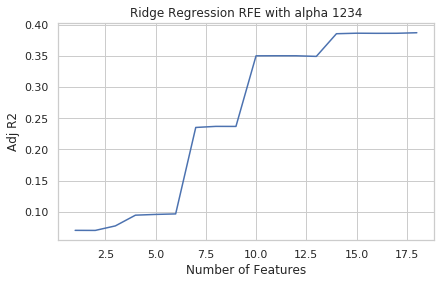

In [88]:
df_ridge = getDFofAdjR2ForModelUsingRFE(Ridge(alpha=1234))
plotRes(df_ridge, 'Ridge Regression RFE with alpha 1234')

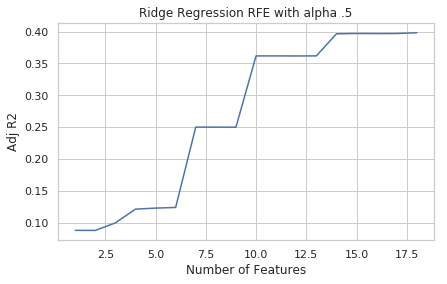

In [89]:
df_ridge = getDFofAdjR2ForModelUsingRFE(Ridge(alpha=.5))
plotRes(df_ridge, 'Ridge Regression RFE with alpha .5')

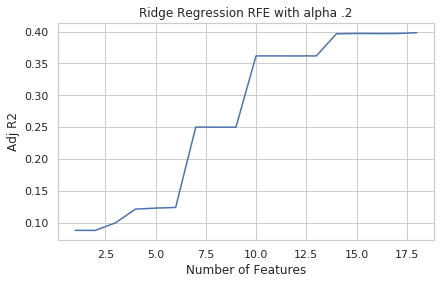

In [90]:
df_ridge = getDFofAdjR2ForModelUsingRFE(Ridge(alpha=.2))
plotRes(df_ridge, 'Ridge Regression RFE with alpha .2')

In [91]:
from sklearn.linear_model import RandomizedLasso

In [92]:
# df_ridge = getDFofAdjR2ForModelUsingRFE(RandomizedLasso())
# plotRes(df_ridge, 'Randomized Lasso Regression RFE')

**TODO:** Using the features identified using RFE for `LinearRegression()` and the same *train-test-spit* of data, compare the performance of `LinearRegression()`, `Ridge()`,  `Lasso()`, and `RandoizedLasso()` based on Adjusted $R^2$.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.linear_model.RandomizedLasso.html

*Note:* you will need to tune your value of $\alpha$ for ridge and lasso regreesion. I would recommend trying ~3 values for $\alpha$. The default is $1$.

There is a very nice tutorial on tuning hyperparameters for regression here:    
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Scikit-learn has a `GridSearch` function with built in cross-validation. You can use this to evaluate multiple paramters automatically. This is not required.   

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

If you're interested you can also evaluate more advanced regressors: RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor. This is not required. These regressors will be discuissed a little later in the class.


In [93]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor


In [94]:
# your work in the cell(s) below

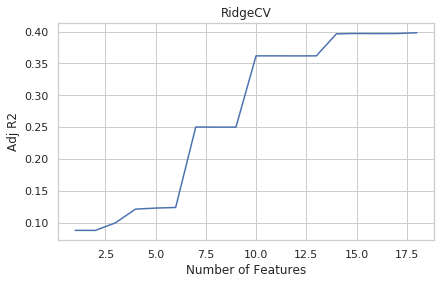

In [95]:
df_3 = getDFofAdjR2ForModelUsingRFE(RidgeCV())
plotRes(df_3, 'RidgeCV')

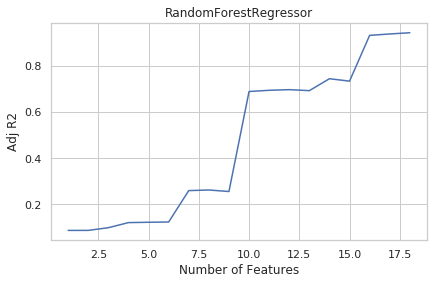

In [96]:
df_3 = getDFofAdjR2ForModelUsingRFE(RandomForestRegressor())
plotRes(df_3, 'RandomForestRegressor')

In [97]:
rfe_automagically(RandomForestRegressor(), 13)

(0.7067936599858692, 13)

In [98]:
for n in [10,30,40,50,0.5,0.3]:
    print(n, rfe_automagically(Lasso(n), 13))

10 (0.32835075296456506, 13)
30 (0.2766236924603501, 13)
40 (0.27527626836072705, 13)
50 (0.27330028937458395, 13)
0.5 (0.3629119352195411, 13)
0.3 (0.36267461606429796, 13)


In [99]:
for n in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(n, rfe_automagically(Lasso(n),10))

0.1 (0.36214909581994537, 10)
0.2 (0.36235221976420606, 10)
0.3 (0.36251658628379635, 10)
0.4 (0.36264154539563753, 10)
0.5 (0.3627358126080438, 10)
0.6 (0.36280906502687793, 10)
0.7 (0.36286154520890546, 10)
0.8 (0.36289349198577836, 10)
0.9 (0.36290473412212587, 10)
1 (0.3628952884106915, 10)


In [100]:
for n in np.linspace(1, 1000, num=50):
    print(n, rfe_automagically(Lasso(n),13))

1.0 (0.3629135523902738, 13)
21.387755102040817 (0.27773041340179316, 13)
41.775510204081634 (0.27497130974177475, 13)
62.163265306122454 (0.27033841964533634, 13)
82.55102040816327 (0.26717818404535243, 13)
102.93877551020408 (0.26321199251026195, 13)
123.32653061224491 (0.2584398450400647, 13)
143.71428571428572 (0.25286174163476094, 13)
164.10204081632654 (0.2464776822943504, 13)
184.48979591836735 (0.2392876670188332, 13)
204.87755102040816 (0.23129169580820974, 13)
225.26530612244898 (0.22248976866247927, 13)
245.65306122448982 (0.21288188558164223, 13)
266.0408163265306 (0.20246804656569872, 13)
286.42857142857144 (0.19124825161464842, 13)
306.81632653061223 (0.17922250072849144, 13)
327.2040816326531 (0.16639079390722777, 13)
347.5918367346939 (0.15275313115085776, 13)
367.9795918367347 (0.13830951245938095, 13)
388.36734693877554 (0.12305993783279734, 13)
408.7551020408163 (0.1070044072711075, 13)
429.14285714285717 (0.09014292077431052, 13)
449.53061224489795 (0.07247547834240

In [101]:
for n in np.linspace(1, 300, num=50):
    print(n, rfe_automagically(Lasso(n),13))

1.0 (0.3629135523902738, 13)
7.1020408163265305 (0.33610034722422666, 13)
13.204081632653061 (0.31735873761533817, 13)
19.306122448979593 (0.28938511622954055, 13)
25.408163265306122 (0.27703178504481907, 13)
31.51020408163265 (0.27646050729497196, 13)
37.61224489795919 (0.2756551363947519, 13)
43.714285714285715 (0.2746156723441594, 13)
49.816326530612244 (0.27334225313227245, 13)
55.91836734693877 (0.2718345509335719, 13)
62.0204081632653 (0.2703577199834153, 13)
68.12244897959184 (0.26949806615584415, 13)
74.22448979591837 (0.2685662147387373, 13)
80.3265306122449 (0.26756216573209435, 13)
86.42857142857143 (0.2664859191359157, 13)
92.53061224489795 (0.2653374749502009, 13)
98.63265306122449 (0.2641168331749498, 13)
104.73469387755102 (0.2628239938101632, 13)
110.83673469387755 (0.26145895685584064, 13)
116.93877551020408 (0.26002172231198195, 13)
123.0408163265306 (0.25851229017858735, 13)
129.14285714285714 (0.2569306604556567, 13)
135.24489795918367 (0.25527683314319016, 13)
141.

In [102]:
for n in [10,30,40,50,0.5,0.3]:
    print(n, rfe_automagically(Ridge(n), 13))

10 (0.36199154131875233, 13)
30 (0.3620828191823653, 13)
40 (0.3621144484023201, 13)
50 (0.3621376766172799, 13)
0.5 (0.3619317157932883, 13)
0.3 (0.3619300936913298, 13)


In [103]:
for n in np.linspace(1, 300, num=50):
    print(n, rfe_automagically(Ridge(n),13))

1.0 (0.3619355298124156, 13)
7.1020408163265305 (0.36197484098256083, 13)
13.204081632653061 (0.3620088974780339, 13)
19.306122448979593 (0.36203895386338036, 13)
25.408163265306122 (0.3620653061021818, 13)
31.51020408163265 (0.36208815884167145, 13)
37.61224489795919 (0.3621076822061432, 13)
43.714285714285715 (0.3621240253760405, 13)
49.816326530612244 (0.3621373222958272, 13)
55.91836734693877 (0.3621476949305996, 13)
62.0204081632653 (0.3621552554413061, 13)
68.12244897959184 (0.36216010776233676, 13)
74.22448979591837 (0.3621623488004099, 13)
80.3265306122449 (0.36216206937314455, 13)
86.42857142857143 (0.3621593549595439, 13)
92.53061224489795 (0.3621542863100523, 13)
98.63265306122449 (0.36214693994932223, 13)
104.73469387755102 (0.36213738859554745, 13)
110.83673469387755 (0.36212570151398027, 13)
116.93877551020408 (0.3621119448178949, 13)
123.0408163265306 (0.36209618172713276, 13)
129.14285714285714 (0.36207847279207306, 13)
135.24489795918367 (0.36205887608916876, 13)
141.3

In [104]:
for n in np.linspace(1, 10, num=50):
    print(n, rfe_automagically(Lasso(n),13))

1.0 (0.3629135523902738, 13)
1.183673469387755 (0.3627883748923394, 13)
1.3673469387755102 (0.36259933143360534, 13)
1.5510204081632653 (0.3623463531369804, 13)
1.7346938775510203 (0.3620296221713488, 13)
1.9183673469387754 (0.3616488392007582, 13)
2.1020408163265305 (0.3612044679279073, 13)
2.2857142857142856 (0.3606960276892792, 13)
2.4693877551020407 (0.36012363503797784, 13)
2.6530612244897958 (0.35948766751634376, 13)
2.836734693877551 (0.35878744607581214, 13)
3.0204081632653064 (0.3580237656574309, 13)
3.2040816326530615 (0.3571961270373052, 13)
3.3877551020408165 (0.3563042191101333, 13)
3.5714285714285716 (0.35534894440291265, 13)
3.7551020408163267 (0.3543297062617875, 13)
3.938775510204082 (0.35324661264895396, 13)
4.122448979591837 (0.3520991084883264, 13)
4.3061224489795915 (0.35088841482310784, 13)
4.4897959183673475 (0.3496137262277833, 13)
4.673469387755102 (0.3482751662528579, 13)
4.857142857142858 (0.3468727488196265, 13)
5.040816326530613 (0.3457616035993849, 13)
5.2

In [105]:
rfe_automagically(AdaBoostRegressor(), 13)

(0.6351797587725416, 13)

In [106]:
rfe_automagically(AdaBoostRegressor(), 10)

(0.6368458816444441, 10)

In [107]:
rfe_automagically(AdaBoostRegressor(), 6)

(0.06210320927610735, 6)

In [108]:
rfe_automagically(AdaBoostRegressor(), 8)

(0.17382084763220607, 8)

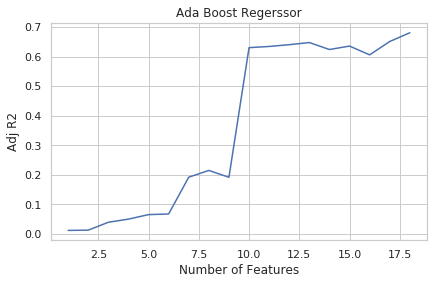

In [109]:
df_3 = getDFofAdjR2ForModelUsingRFE(AdaBoostRegressor())
plotRes(df_3, 'Ada Boost Regerssor')

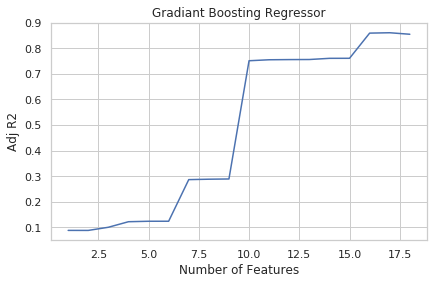

In [111]:
df_3 = getDFofAdjR2ForModelUsingRFE(GradientBoostingRegressor())
plotRes(df_3, 'Gradiant Boosting Regressor')

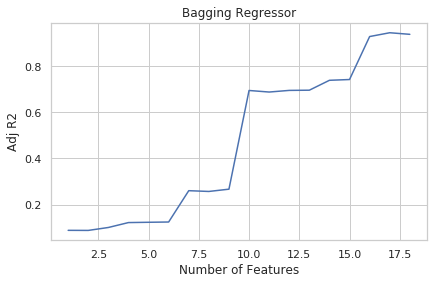

In [113]:
df_3 = getDFofAdjR2ForModelUsingRFE(BaggingRegressor())
plotRes(df_3, 'Bagging Regressor')

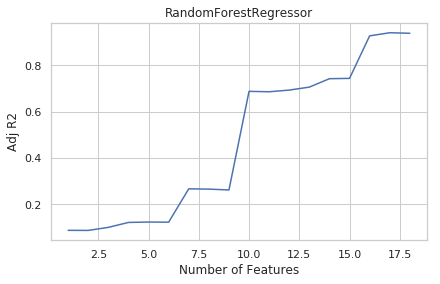

In [114]:
df_3 = getDFofAdjR2ForModelUsingRFE(RandomForestRegressor())
plotRes(df_3, 'RandomForestRegressor')